# 집값  예측 경진대회
- https://dacon.io/competitions/official/235869/overview/description

> Feature
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- GrLivArea : 지상층 생활 면적
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GarageArea: 차고 면적 
- FullBath : 지상층 화장실 개수 
- GarageCars: 차고 자리 개수
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- GarageYrBlt : 차고 완공 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- KitchenQual : 부억 품질 

> Target
- target : 집값(달러 단위)


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('precision', 2)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rc('figure', facecolor='w', edgecolor='w')

# DataSet

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.drop(['id'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

In [4]:
print("Train data's shape : {}".format(df_train.shape))
print("Test data's shape : {}".format(df_test.shape))

Train data's shape : (1350, 14)
Test data's shape : (1350, 13)


In [5]:
# Null 값 전혀 없음
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [6]:
df_train.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [7]:
df_train.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00
mean,6.21,1513.54,1.87,502.01,1082.64,1167.47,1.56,1972.99,1985.10,1978.47,186406.31
std,1.34,487.52,0.65,191.39,384.07,375.06,0.55,29.31,20.15,25.38,78435.42
min,2.00,480.00,1.00,100.00,105.00,480.00,0.00,1880.00,1950.00,1900.00,12789.00
25%,5.00,1144.00,1.00,368.00,816.00,886.25,1.00,1955.00,1968.00,1961.00,135000.00
50%,6.00,1445.50,2.00,484.00,1009.00,1092.50,2.00,1976.00,1993.00,1978.50,165375.00
75%,7.00,1774.50,2.00,588.00,1309.50,1396.50,2.00,2002.00,2004.00,2002.00,217875.00
max,10.00,4476.00,5.00,1488.00,2660.00,2898.00,4.00,2010.00,2010.00,2207.00,745000.00


# EDA

## Target

> 정보
- 좌측으로 편향되어 보임 -> log transformation 적용
- log transformation 했을 때 엄청 작은 값 있음. (10.5 3.3.11에서 제거!)

In [8]:
target = df_train['target']

In [9]:
target.describe()

count      1350.00
mean     186406.31
std       78435.42
min       12789.00
25%      135000.00
50%      165375.00
75%      217875.00
max      745000.00
Name: target, dtype: float64

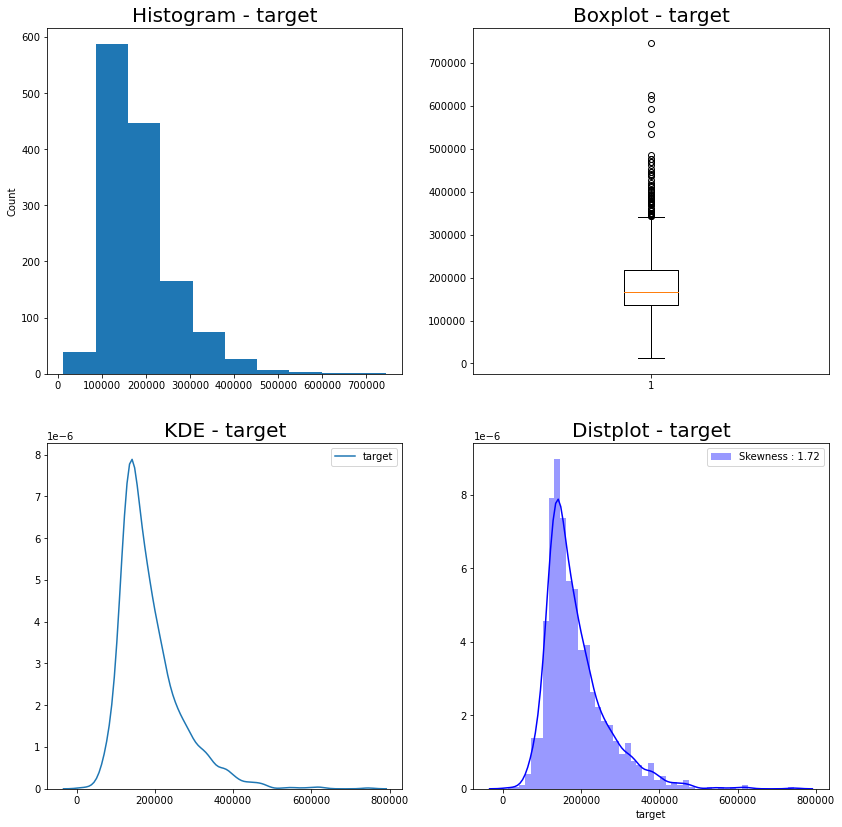

In [10]:
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.hist(target)
plt.title('Histogram - target', fontdict={'fontsize':20})
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.boxplot(target)
plt.title('Boxplot - target', fontdict={'fontsize':20})

plt.subplot(2,2,3)
sns.kdeplot(target)
plt.title('KDE - target', fontdict={'fontsize':20})

plt.subplot(2,2,4)
sns.distplot(target,
                   color='b',
                   label='Skewness : {:.2f}'.format(target.skew()))
plt.legend(loc='best')
plt.title('Distplot - target', fontdict={'fontsize':20})

plt.show()

In [11]:
np.log1p(df_train['target'])

0       12.86
1       12.18
2       11.72
3       11.81
4       12.43
        ...  
1345    12.23
1346    12.87
1347    11.87
1348    11.78
1349    11.85
Name: target, Length: 1350, dtype: float64

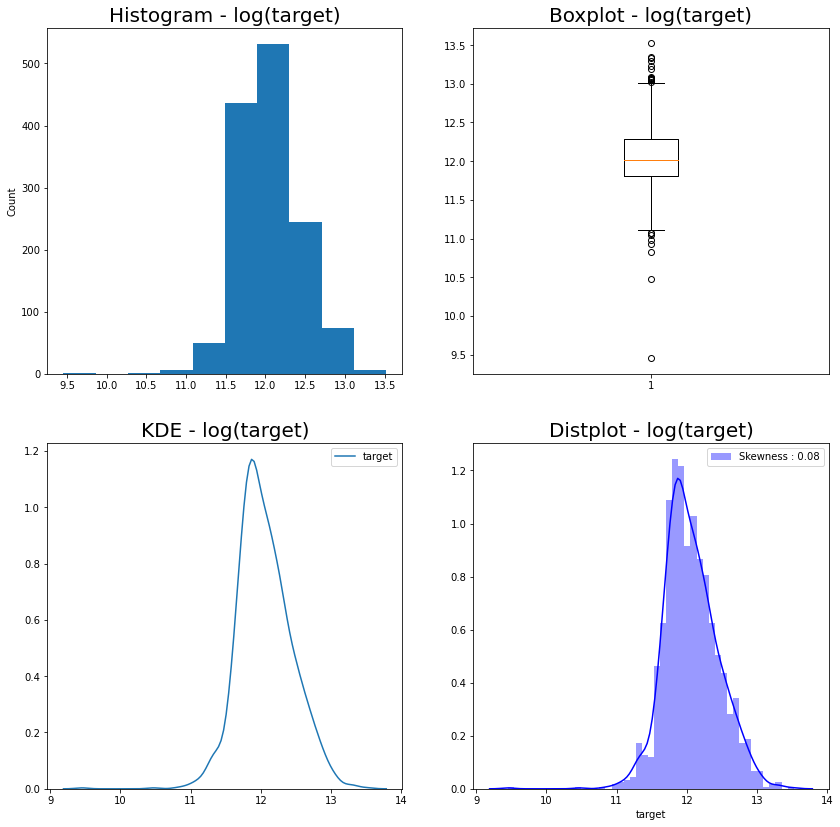

In [12]:
# log transformation
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.hist(np.log1p(df_train['target']))
plt.title('Histogram - log(target)', fontdict={'fontsize':20})
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.boxplot(np.log1p(df_train['target']))
plt.title('Boxplot - log(target)', fontdict={'fontsize':20})

plt.subplot(2,2,3)
sns.kdeplot(np.log1p(df_train['target']))
plt.title('KDE - log(target)', fontdict={'fontsize':20})

plt.subplot(2,2,4)
sns.distplot(np.log1p(df_train['target']),
             color='b',
             label='Skewness : {:.2f}'.format(np.log1p(df_train['target']).skew()))
plt.legend(loc='best')
plt.title('Distplot - log(target)', fontdict={'fontsize':20})

plt.show()

## Feature - type으로 분류

In [13]:
numerical_feature =  df_train.columns[df_train.dtypes!=object][:-1] # target 제외
categorical_feature = df_train.columns[df_train.dtypes==object]

print('수치형 데이터 : {}'.format(list(numerical_feature)))
print('카테고리형 데이터 : {}'.format(list(categorical_feature)))

수치형 데이터 : ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt']
카테고리형 데이터 : ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


## Numerical Features

### Overall Qual

> 전반적 재료와 마감 품질
- 다른 Qual Feature들과 비교해서 차원 축소 고려

In [14]:
df_train['Overall Qual'].head()

0    10
1     7
2     5
3     5
4     7
Name: Overall Qual, dtype: int64

In [15]:
df_train['Overall Qual'].value_counts().sort_index()

2       3
3       8
4      75
5     379
6     351
7     307
8     156
9      56
10     15
Name: Overall Qual, dtype: int64

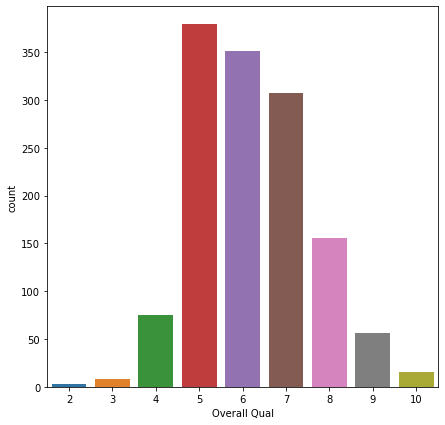

In [16]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x="Overall Qual", data=df_train)
plt.show()

### Gr Liv Area

> 지상층 생활 면적
- 왼쪽으로 편향되어 보임 -> log Transformation

In [17]:
df_train['Gr Liv Area'].head()

0    2392
1    1352
2     900
3    1174
4    1958
Name: Gr Liv Area, dtype: int64

In [18]:
df_train['Gr Liv Area'].describe()

count    1350.00
mean     1513.54
std       487.52
min       480.00
25%      1144.00
50%      1445.50
75%      1774.50
max      4476.00
Name: Gr Liv Area, dtype: float64

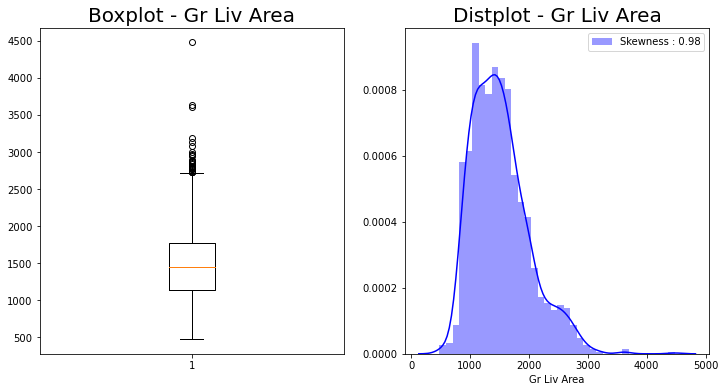

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['Gr Liv Area'])
plt.title('Boxplot - Gr Liv Area', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['Gr Liv Area'], color='b', label='Skewness : {:.2f}'.format(df_train['Gr Liv Area'].skew()))
plt.legend(loc='best')
plt.title('Distplot - Gr Liv Area', fontdict={'fontsize':20})

plt.show()

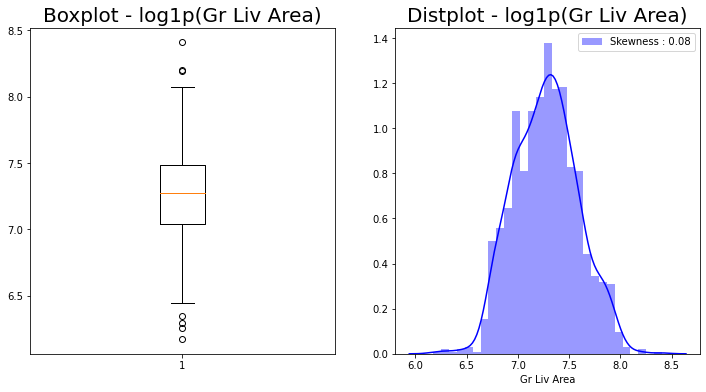

In [20]:
# log transformation
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['Gr Liv Area']))
plt.title('Boxplot - log1p(Gr Liv Area)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['Gr Liv Area']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['Gr Liv Area']).skew()))
plt.legend(loc='best')
plt.title('Distplot - log1p(Gr Liv Area)', fontdict={'fontsize':20})

plt.show()

### Garage Cars

> 차고 자리 개수

In [21]:
df_train['Garage Cars'].head()

0    3
1    2
2    1
3    2
4    3
Name: Garage Cars, dtype: int64

In [22]:
df_train['Garage Cars'].value_counts()

2    794
1    372
3    172
4     11
5      1
Name: Garage Cars, dtype: int64

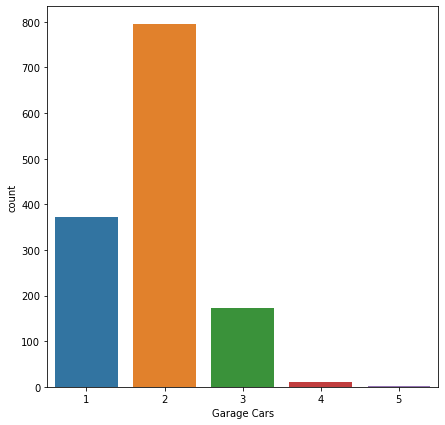

In [23]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x="Garage Cars", data=df_train)
plt.show()

### Garage Area

> 차고 면적
- 왼쪽으로 편향되어 보임 -> log transformation

In [24]:
df_train['Garage Area'].head()

0    968
1    466
2    288
3    576
4    936
Name: Garage Area, dtype: int64

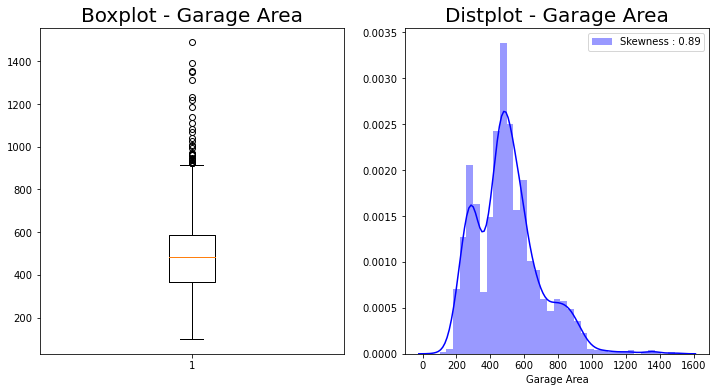

In [25]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['Garage Area'])
plt.title('Boxplot - Garage Area', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['Garage Area'], color='b', label='Skewness : {:.2f}'.format(df_train['Garage Area'].skew()))
plt.legend(loc='best')
plt.title('Distplot - Garage Area', fontdict={'fontsize':20})

plt.show()

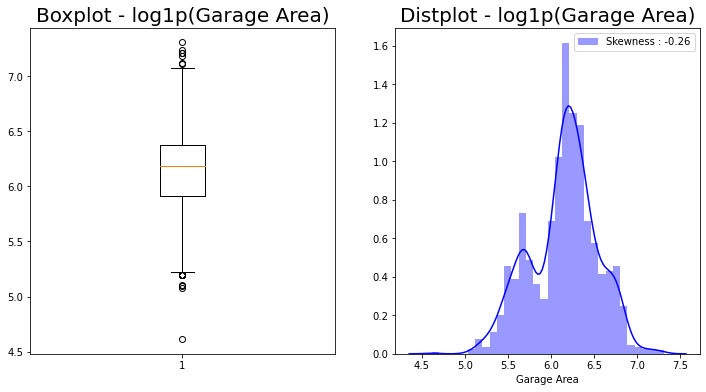

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['Garage Area']))
plt.title('Boxplot - log1p(Garage Area)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['Garage Area']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['Garage Area']).skew()))
plt.legend(loc='best')
plt.title('Distplot - log1p(Garage Area)', fontdict={'fontsize':20})

plt.show()

### Total Bsmt SF

> 지하실 면적
- 편향되어 보임 -> 어떤 transformation이 좋은지 모르겠음

In [27]:
df_train['Total Bsmt SF'].head()

0    2392
1    1352
2     864
3     680
4    1026
Name: Total Bsmt SF, dtype: int64

In [28]:
pd.DataFrame(df_train['Total Bsmt SF'].describe())

,Total Bsmt SF
count,1350.00
mean,1082.64
std,384.07
min,105.00
25%,816.00
50%,1009.00
75%,1309.50
max,2660.00


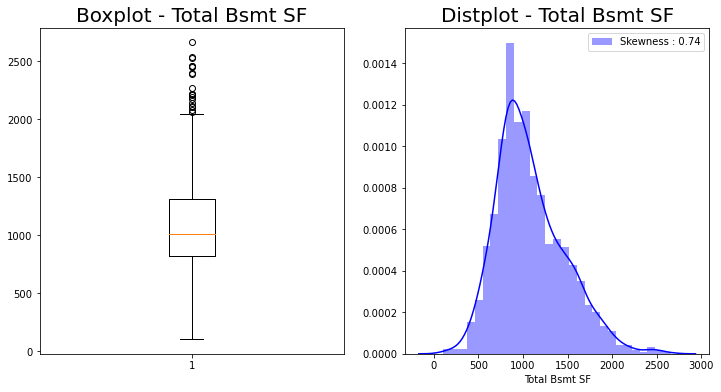

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['Total Bsmt SF'])
plt.title('Boxplot - Total Bsmt SF', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['Total Bsmt SF'], color='b', label='Skewness : {:.2f}'.format(df_train['Total Bsmt SF'].skew()))
plt.legend(loc='best')
plt.title('Distplot - Total Bsmt SF', fontdict={'fontsize':20})

plt.show()

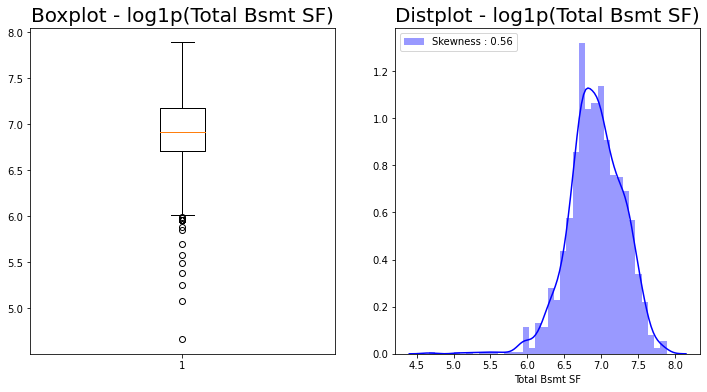

In [30]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['Total Bsmt SF']))
plt.title('Boxplot - log1p(Total Bsmt SF)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['Total Bsmt SF']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['Total Bsmt SF'].skew())))
plt.legend(loc='best')
plt.title('Distplot - log1p(Total Bsmt SF)', fontdict={'fontsize':20})

plt.show()

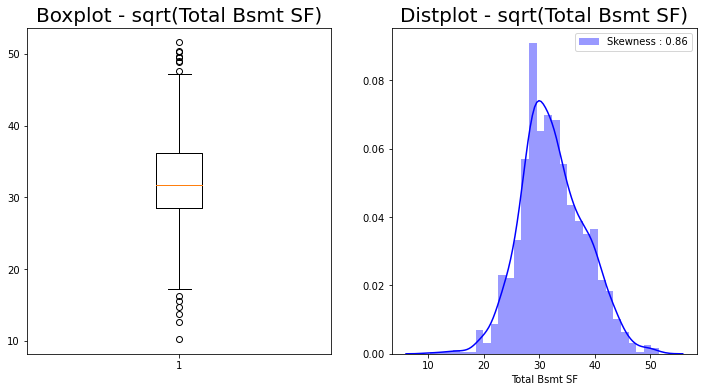

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.sqrt(df_train['Total Bsmt SF']))
plt.title('Boxplot - sqrt(Total Bsmt SF)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.sqrt(df_train['Total Bsmt SF']), color='b', label='Skewness : {:.2f}'.format(np.sqrt(df_train['Total Bsmt SF'].skew())))
plt.legend(loc='best')
plt.title('Distplot - sqrt(Total Bsmt SF)', fontdict={'fontsize':20})

plt.show()

### 1st Flr SF

> 1층 면적
- 왼쪽으로 편향 -> log transformation

In [32]:
df_train['1st Flr SF'].head()

0    2392
1    1352
2     900
3     680
4    1026
Name: 1st Flr SF, dtype: int64

In [33]:
pd.DataFrame(df_train['1st Flr SF'].describe())

,1st Flr SF
count,1350.00
mean,1167.47
std,375.06
min,480.00
25%,886.25
50%,1092.50
75%,1396.50
max,2898.00


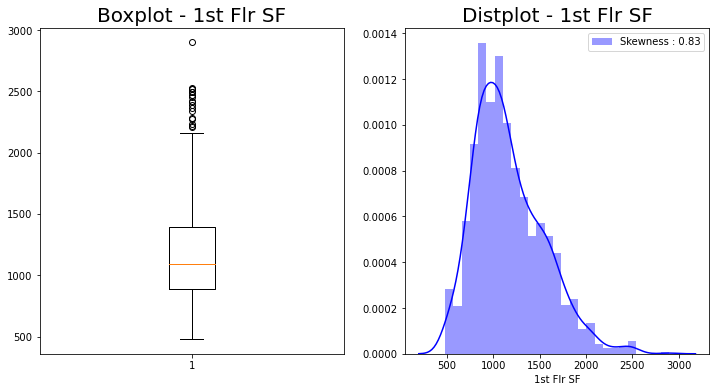

In [34]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['1st Flr SF'])
plt.title('Boxplot - 1st Flr SF', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['1st Flr SF'], color='b', label='Skewness : {:.2f}'.format(df_train['1st Flr SF'].skew()))
plt.legend(loc='best')
plt.title('Distplot - 1st Flr SF', fontdict={'fontsize':20})

plt.show()

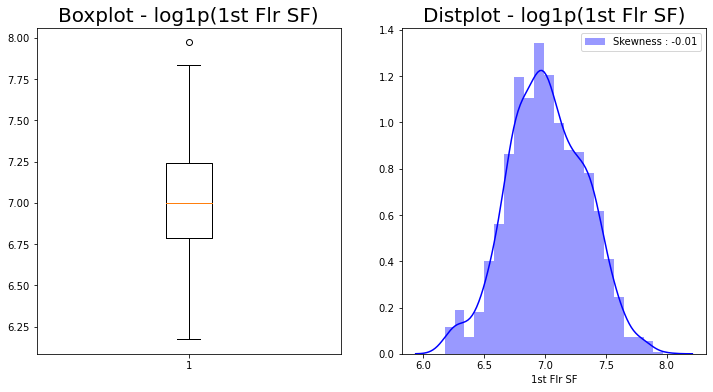

In [35]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['1st Flr SF']))
plt.title('Boxplot - log1p(1st Flr SF)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['1st Flr SF']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['1st Flr SF']).skew()))
plt.legend(loc='best')
plt.title('Distplot - log1p(1st Flr SF)', fontdict={'fontsize':20})

plt.show()

### Full Bath

> 지상층 화장실 개수

In [36]:
df_train['Full Bath'].head()

0    2
1    2
2    1
3    1
4    2
Name: Full Bath, dtype: int64

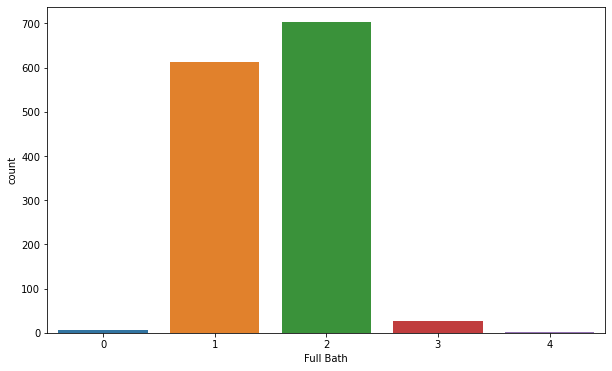

In [37]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Full Bath", data=df_train)
plt.show()

### Year Built

> 완공 연도

In [38]:
df_train['Year Built'].head()

0    2003
1    2006
2    1967
3    1900
4    2005
Name: Year Built, dtype: int64

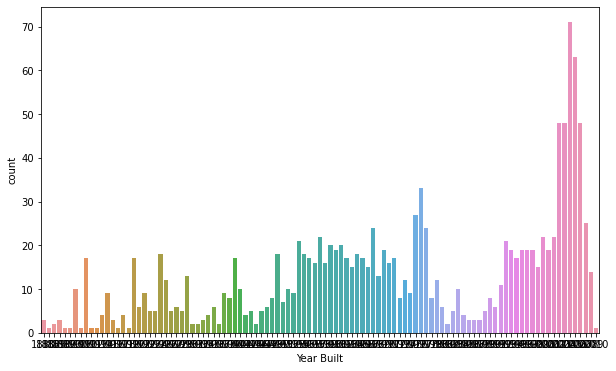

In [39]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Year Built", data=df_train)
plt.show()

### Year Remod/Add

> 리모델링 연도

In [40]:
df_train['Year Remod/Add'].head()

0    2003
1    2007
2    1967
3    2006
4    2005
Name: Year Remod/Add, dtype: int64

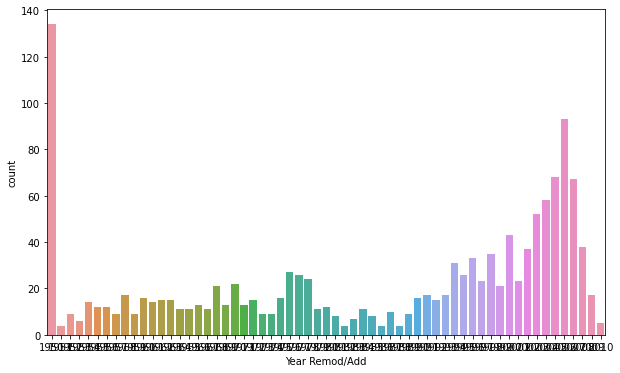

In [41]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Year Remod/Add", data=df_train)
plt.show()

### Garage Yr Blt

> 차고 완공 연도

In [42]:
df_train['Garage Yr Blt'].head()

0    2003
1    2006
2    1967
3    2000
4    2005
Name: Garage Yr Blt, dtype: int64

In [43]:
df_train['Garage Yr Blt'].value_counts()

2005    70
2006    53
2007    51
2004    50
2003    49
        ..
1924     1
1929     1
1931     1
1943     1
2207     1
Name: Garage Yr Blt, Length: 97, dtype: int64

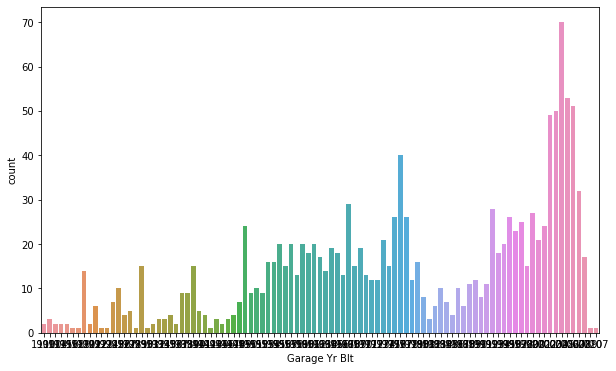

In [44]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Garage Yr Blt", data=df_train)
plt.show()

In [45]:
# 잘 못 기재된 듯 -> 삭제!
df_train[df_train['Garage Yr Blt'] >= 2100].index

Int64Index([254], dtype='int64')

In [46]:
df_train.drop(df_train[df_train['Garage Yr Blt'] >= 2100].index, axis=0, inplace=True)

### With target

- log1p(target)가 10.5 이하면 제거 : 이상치

In [47]:
df_train.drop(df_train[np.log1p(df_train['target']) <= 10.5].index, axis=0, inplace=True)

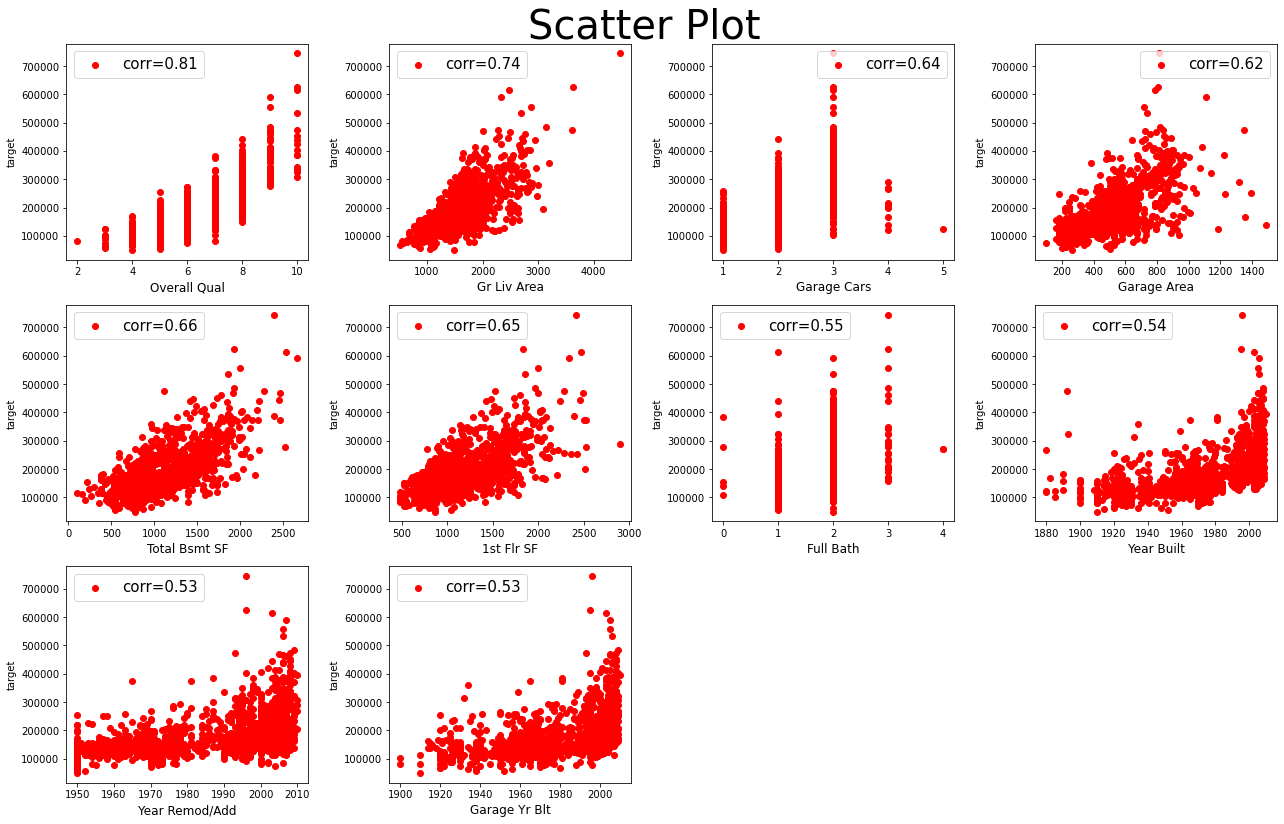

In [48]:
feature = numerical_feature
target = 'target'

plt.figure(figsize=(18,12))
plt.suptitle("Scatter Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(3,4,i+1)
    plt.xlabel(feature[i], fontsize=12)
    plt.ylabel(target, fontsize=10)
    corr_score = df_train[[feature[i],target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score>0 else 'blue'
    plt.scatter(df_train[feature[i]], df_train[target], color=c, label='corr={}'.format(corr_score))
    plt.legend(fontsize=15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

### Area

> Area
- GrLivArea : 지상층 생활 면적
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GarageArea: 차고 면적 

> Area
- 지상층 생활 면적은 target과 상관성이 높음, 생활면적과 그냥 면적과는 차이가 있으니 그대로 사용해야할 듯
- 지하실 면적과 1층 면적이 매우 상관관계가 높음 -> 평균 사용??

In [50]:
df_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [54]:
df_train.loc[:,['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area','target']]

,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,target
0,2392,2392,2392,968,386250
1,1352,1352,1352,466,194000
2,900,864,900,288,123000
3,1174,680,680,576,135000
4,1958,1026,1026,936,250000
...,...,...,...,...,...
1345,1756,872,888,422,204000
1346,2748,1850,1850,850,390000
1347,1214,1214,1214,318,143000
1348,894,864,894,440,131000


In [55]:
df_train.loc[:,['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area','target']].corr()

,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,target
Gr Liv Area,1.00,0.42,0.52,0.48,0.74
Total Bsmt SF,0.42,1.00,0.87,0.50,0.66
1st Flr SF,0.52,0.87,1.00,0.49,0.65
Garage Area,0.48,0.50,0.49,1.00,0.62
target,0.74,0.66,0.65,0.62,1.00


### Garage

> Garage
- Garage Cars와 Garage Area의 상관성이 매우 높음, target과의 상관성은 비슷함 -> 어떻게 처리할까


In [58]:
df_train.loc[:,['Garage Cars', 'Garage Area', 'target']]

,Garage Cars,Garage Area,target
0,3,968,386250
1,2,466,194000
2,1,288,123000
3,2,576,135000
4,3,936,250000
...,...,...,...
1345,2,422,204000
1346,3,850,390000
1347,1,318,143000
1348,2,440,131000


In [59]:
df_train.loc[:,['Garage Cars', 'Garage Area', 'target']].corr()

,Garage Cars,Garage Area,target
Garage Cars,1.00,0.84,0.64
Garage Area,0.84,1.00,0.62
target,0.64,0.62,1.00


### Year

> Year 관련 Features
- target과의 correlation은 비슷함
- Year Built와 Garage Yr Blt의 correlation이 매우 높음

In [ ]:
df_train.loc[:,['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']]

In [ ]:
df_train.loc[:,['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']].corr()

In [ ]:
print('\nYear Built == year Remod/Add : {}'.format((df_train['Year Built'] == df_train['Year Remod/Add']).sum()))
print('\nYear Built == Garage Yr Blt : {}'.format((df_train['Year Built'] == df_train['Garage Yr Blt']).sum()))
print('\nyear Remod/Add == Garage Yr Blt : {}'.format((df_train['Year Remod/Add'] == df_train['Garage Yr Blt']).sum()))
print('\nYear Built == year Remod/Add == Garage Yr Blt : {}'.format(((df_train['Year Remod/Add'] == df_train['Garage Yr Blt']) & (df_train['Year Built'] == df_train['Garage Yr Blt'])).sum()))

## Categorical Features

> Quality
- Ex : 	Excellent
- Gd :	Good
- TA : 	Average/Typical
- Fa :	Fair
- Po :	Poor

### Exter Qual

> 외관 재료 품질

In [ ]:
df_train['Exter Qual'].value_counts()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Exter Qual", data=df_train)
plt.show()

### Kitchen Qual

> 부억 품질

In [ ]:
df_train['Kitchen Qual'].value_counts()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Kitchen Qual", data=df_train)
plt.show()

### Bsmt Qual

> 지하실 높이

In [ ]:
df_train['Bsmt Qual'].value_counts()

In [ ]:
df_train[df_train['Bsmt Qual'] == "Po"]

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Bsmt Qual", data=df_train)
plt.show()

### With target

In [ ]:
categorical_feature

In [ ]:
plt.figure(figsize=(6,6))
sns.catplot(x='Exter Qual', y=target, data=df_train)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.catplot(x='Kitchen Qual', y=target, data=df_train)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.catplot(x='Bsmt Qual', y=target, data=df_train)
plt.show()

### Qual

> Quality
- Overall Qual로 모든걸 대체??
- Qual 처리 어떻게 하는게 효율적일까??

In [80]:
df_train.loc[:,['Bsmt Qual', 'Kitchen Qual', 'Exter Qual', 'Overall Qual','target']]

,Bsmt Qual,Kitchen Qual,Exter Qual,Overall Qual,target
0,Ex,Ex,Ex,10,386250
1,Ex,Gd,Gd,7,194000
2,TA,TA,TA,5,123000
3,TA,Gd,TA,5,135000
4,Gd,Gd,Gd,7,250000
...,...,...,...,...,...
1345,Ex,TA,Gd,6,204000
1346,Ex,Ex,Gd,9,390000
1347,TA,TA,TA,5,143000
1348,Gd,TA,TA,5,131000


In [69]:
# 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환

corr_df = df_train.copy()
corr_df[categorical_feature] = corr_df[categorical_feature].astype(str).apply(LabelEncoder().fit_transform)

In [81]:
corr_df.loc[:,['Bsmt Qual', 'Kitchen Qual', 'Exter Qual','Overall Qual','target']].corr()

,Bsmt Qual,Kitchen Qual,Exter Qual,Overall Qual,target
Bsmt Qual,1.00,0.52,0.61,-0.64,-0.64
Kitchen Qual,0.52,1.00,0.66,-0.61,-0.63
Exter Qual,0.61,0.66,1.00,-0.70,-0.66
Overall Qual,-0.64,-0.61,-0.70,1.00,0.81
target,-0.64,-0.63,-0.66,0.81,1.00


In [77]:
print('\n Bsmt Qual == Kitchen Qual : {}'.format((df_train['Bsmt Qual'] == df_train['Kitchen Qual']).sum()))
print('\n Bsmt Qual == Exter Qual : {}'.format((df_train['Bsmt Qual'] == df_train['Exter Qual']).sum()))
print('\n Exter Qual == Kitchen Qual : {}'.format((df_train['Exter Qual'] == df_train['Kitchen Qual']).sum()))
print('\n Exter Qual == Kitchen Qual == Bsmt Qual: {}'.format(((df_train['Exter Qual'] == df_train['Kitchen Qual']) & (df_train['Bsmt Qual'] == df_train['Kitchen Qual'])).sum()))


 Bsmt Qual == Kitchen Qual : 911

 Bsmt Qual == Exter Qual : 955

 Exter Qual == Kitchen Qual : 1057

 Exter Qual == Kitchen Qual == Bsmt Qual: 798


# Feature Engineering

- Feature들 상관관계 확인
- Feature 줄이거나 관계있는 Feature들 합치거나 새로운 피쳐 생성
- 편향된 Feature -> transformation

## Feature

In [ ]:
#년도와 관련된 변수 2022-변수로 바꿔주기
df_train['Year Built']=2022-df_train['Year Built']
df_train['Year Remod/Add']=2022-df_train['Year Remod/Add']
df_train['Garage Yr Blt']=2022-df_train['Garage Yr Blt']
df_test['Year Built']=2022-df_test['Year Built']
df_test['Year Remod/Add']=2022-df_test['Year Remod/Add']
df_test['Garage Yr Blt']=2022-df_test['Garage Yr Blt']

## Transformation

> log Transformation
- target
- Gr Liv Area
- Garage Area
- 1st Flr SF

In [ ]:
df_train['target'] = np.log1p(df_train['target'])

logtr = ['Gr Liv Area', 'Garage Area', '1st Flr SF']

for i in range(len(logtr)):
    df_train[logtr[i]] = np.log1p(df_train[logtr[i]])
    df_test[logtr[i]] = np.log1p(df_test[logtr[i]])

## Correlation

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환

corr_df = df_train.copy()
corr_df[categorical_feature] = corr_df[categorical_feature].astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
# 상관관계 분석도
plt.figure(figsize=(14,7))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title("correlation between features", fontsize=40)

plt.show()

## One-hot Encoding

In [ ]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [ ]:
# df_test에는 df_train과 다르게 'Kitchen Qual_Po' 가 있음 -> 우선 제거
df_test.drop(['Kitchen Qual_Po'], axis=1, inplace=True)

# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
df_train.iloc[:,:11]

In [ ]:
# categorical Qual 삭제하고 해봄
X_data = df_train.iloc[:,:11].drop('target', axis=1).values
target = df_train['target'].values

test_data = df_test.iloc[:,:10].values

In [ ]:
print(X_data.shape)
print(target.shape)
print(test_data.shape)

In [ ]:
# cross_val_score
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

## Models

In [ ]:
model_NMAE = {}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target, test_size=0.3, random_state=0)

In [ ]:
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

dt_reg.fit(X_train,y_train)
rf_reg.fit(X_train,y_train)
gb_reg.fit(X_train,y_train)
xgb_reg.fit(X_train,y_train)
lgb_reg.fit(X_train,y_train)

y_preds_dt = dt_reg.predict(X_test)
y_preds_rf = rf_reg.predict(X_test)
y_preds_gb = gb_reg.predict(X_test)
y_preds_xgb = xgb_reg.predict(X_test)
y_preds_lgb = lgb_reg.predict(X_test)

In [ ]:
result = {}

In [ ]:
result['score_dt'] = NMAE(y_test, y_preds_dt)
result['score_rf'] = NMAE(y_test, y_preds_rf)
result['score_gb'] = NMAE(y_test, y_preds_gb)
result['score_xgb'] = NMAE(y_test, y_preds_xgb)
result['score_lgb'] = NMAE(y_test, y_preds_lgb)

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
pd.DataFrame(result.values(), index=result.keys()).rename(columns={0:'NMAE'})

## Prediction

In [ ]:
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

dt_reg.fit(X_data,target)
rf_reg.fit(X_data,target)
gb_reg.fit(X_data,target)
xgb_reg.fit(X_data,target)
lgb_reg.fit(X_data,target)

y_preds_dt = dt_reg.predict(test_data)
y_preds_rf = rf_reg.predict(test_data)
y_preds_gb = gb_reg.predict(test_data)
y_preds_xgb = xgb_reg.predict(test_data)
y_preds_lgb = lgb_reg.predict(test_data)

## Ensemble

In [ ]:
# decision_tree 제외하고 4개
pred_ensemble = y_preds_gb*0.25 + y_preds_lgb*0.25 + y_preds_rf*0.25 + y_preds_xgb*0.25

In [ ]:
pred_ensemble = np.expm1(pred_ensemble)

In [ ]:
# submission
submission_ensemble = pd.read_csv('./data/sample_submission.csv')

In [ ]:
submission_ensemble['target'] = pred_ensemble

In [ ]:
submission_ensemble.to_csv("./data/submission_ensemble.csv", index=False)